# Machine Learning Online Class - Exercise 2: Logistic Regression 

## ex2 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
#  Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.

data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'y'])
X = data.values[:, :2]
y = data.y.values.reshape(len(X),1)

print(f'Training samples :\n {X[:10, :]}\n')
print(f'Training labels :\n {y[:10, :]}\n')



Training samples :
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]]

Training labels :
 [[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]



### Plotting 

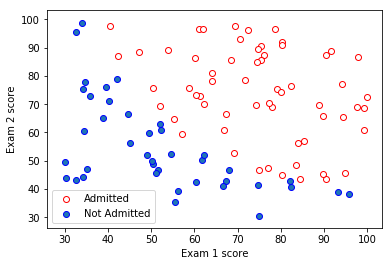

In [3]:
def plotData(X, y, xlegend, ylegend, xlabel, ylabel):
    pos = np.argwhere(y==1)[:,0] # positive examples
    neg = np.argwhere(y==0)[:,0] # negative examples
    
    plt.scatter(X[pos,0], X[pos,1],c='w', edgecolors='red', marker='o', label=xlegend)
    plt.scatter(X[neg,0], X[neg,1], edgecolors='blue', marker='o', label=ylegend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    
    plt.show()

plotData(X, y, 'Admitted', 'Not Admitted', 'Exam 1 score', 'Exam 2 score')

### Optimizing using TNC

In [4]:
def costFunction(theta, X, y):
    # compute costfunction and gradient for logistic regression
    m = len(X)
    
    J = 0
    grad = np.zeros(shape=theta.shape)
    
    h = 1/(1+np.exp(-(X.dot(theta))))
    
    J = (1/m) * (-y.T.dot(np.log(h)) - (1 -y).T.dot(np.log(1-h)))
    
    grad = (1/m) * (X.T.dot(h - y))
    
    return (J,grad)
    

In [5]:
initial_theta = np.zeros((len(X[0])+1,1))

X_aug = np.append(np.ones((len(X),1)), X, axis=1)
print(f'augmented X : \n{X_aug[:10, :]}\n')

(cost, grad) = costFunction(initial_theta, X_aug, y)

print(f'Cost at initial theta (zeros): \n{cost}');
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros): \n');
print(f'{grad}');
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

augmented X : 
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]]

Cost at initial theta (zeros): 
[[0.69314718]]
Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [6]:
initial_theta = np.zeros((len(X[0])+1))

def sigmoid(X, theta) : return 1/(1+np.exp(-(X.dot(theta.reshape(len(X[0]),1)))))
    
def cost(theta, X, y): 
    m = len(X)
    h = sigmoid(X, theta)
    return (1/m) * (-y.T.dot(np.log(h)) - (1 -y).T.dot(np.log(1-h)))
    
def gradientDescent(theta, X, y):
    m = len(X)
    h = sigmoid(X, theta)
    grad_ret = (1/m) * (X.T.dot(h - y))
    return grad_ret.flatten()


optimizer = op.minimize(fun=cost, x0=initial_theta, args=(X_aug, y), method='TNC', jac=gradientDescent)
J = optimizer.fun
theta = optimizer.x

print(f'Cost at theta found by TNC: {optimizer.fun}');
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print(f'{optimizer.x} \n');
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by TNC: [[0.2034977]]
Expected cost (approx): 0.203

theta: 

[-25.16131869   0.20623159   0.20147149] 

Expected theta (approx):

 -25.161
 0.206
 0.201



In [7]:
prob = sigmoid(np.array([[1, 45, 85]]),theta)
print(f'For a student with scores 45 and 85, we predict an admission probability of {prob}\n')
print('Expected value: 0.775 +/- 0.002\n\n')

For a student with scores 45 and 85, we predict an admission probability of [[0.77629062]]

Expected value: 0.775 +/- 0.002




In [8]:
def predict(theta, X):
    threshold = 0.5
    
    sig = sigmoid(X, theta)
    p = np.array([1 if i >= 0.5 else 0 for i in sig ])
    return p
p = predict(theta, X_aug)

print(f'Train Accuracy: {np.mean(np.array([1 if i==j else 0 for i,j in zip(p,y)])) * 100}')
print('Expected accuracy (approx): 89.0\n')
print('\n')

Train Accuracy: 89.0
Expected accuracy (approx): 89.0





## ex2_reg
Logistic Regression with regularization

In [9]:
#  Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.

data = pd.read_csv('ex2data2.txt', names=['T1', 'T2', 'y'])
X = data.values[:, :2]
y = data.y.values.reshape(len(X),1)

print(f'Training samples :\n {X[:10, :]}\n')
print(f'Training labels :\n {y[:10, :]}\n')


Training samples :
 [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]
 [-0.52477   0.2098  ]
 [-0.39804   0.034357]
 [-0.30588  -0.19225 ]
 [ 0.016705 -0.40424 ]
 [ 0.13191  -0.51389 ]]

Training labels :
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]



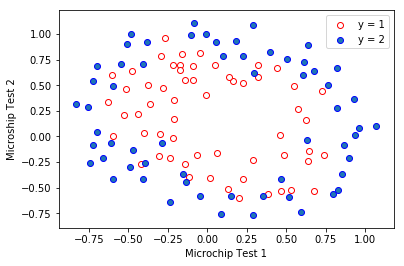

In [10]:
plotData(X,y, 'y = 1', 'y = 2', 'Microchip Test 1', 'Microship Test 2')

### Regularized Logistic Regression 

In [11]:
def featureMap(x1, x2, degree):
    # Feature mapping function to polynomial features
    out = np.ones((len(x1),1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            add_this = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, add_this.reshape(len(out),1), axis=1)
    return out

X = featureMap(X[:,0], X[:,1], 6)
X.shape

(118, 28)

In [12]:
def costFunctionReg(theta, X, y, lbda):
    m = len(X)
    grad = np.zeros((len(X[0]),1))
    
    (J, temp) = costFunction(theta, X, y)
    J += lbda * (theta[1:,:].T.dot(theta[1:,:])) /(lbda * m)
    
    h = sigmoid(X, theta)
    grad[0,:] = (1/m) * (X[:,0].T.dot(h - y))
    grad[1:,:] = (1/m) * (X[:,1:].T.dot(h - y)) + (lbda/m) * theta[1:,:]
    
    return J, grad

In [13]:
initial_theta = np.zeros((len(X[0]),1))
lbda = 1 # lambda

(cost, grad) = costFunctionReg(initial_theta, X, y, lbda)

print(f'Cost at initial theta (zeros): {cost}\n')
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(f'{grad[:5,:]}\n')
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros): [[0.69314718]]

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]

Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [14]:
# Compute and display cost and gradient with all-ones theta and lambda = 10

test_theta = np.ones((len(X[0]),1))
lbda = 10 # lambda

(cost, grad) = costFunctionReg(test_theta, X, y, lbda)

print(f'Cost at initial theta (zeros): {cost}\n')
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
print(f'{grad[:5,:]}\n')
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at initial theta (zeros): [[2.24925509]]

Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]

Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



In [15]:
initial_theta = np.zeros((len(X[0])))
lbda = 2

def sigmoid(X, theta) : return 1/(1+np.exp(-(X.dot(theta.reshape(len(X[0]),1)))))
    
def cost(theta, X, y, lbda): 
    m = len(X)
    h = sigmoid(X, theta)
    J = (1/m) * (-y.T.dot(np.log(h)) - (1 -y).T.dot(np.log(1-h)))
    theta = theta.reshape(len(X[0]),1)
    J += lbda * (theta[1:,:].T.dot(theta[1:,:])) /(2 * m)
    return J
    
def gradientDescent(theta, X, y, lbda):
    m = len(X)
    h = sigmoid(X, theta)
    theta = theta.reshape(len(X[0]),1)
    grad_ret = (1/m) * (X.T.dot(h - y))
    grad_ret[1:,:] += (lbda/m) * theta[1:,:]
    return grad_ret.flatten()
  

optimizer = op.minimize(fun=cost, x0=initial_theta, args=(X, y, lbda), method='L-BFGS-B', jac=gradientDescent)
J = optimizer.fun
theta = optimizer.x

def predict(theta, X):
    threshold = 0.5
    
    sig = sigmoid(X, theta)
    p = np.array([1 if i >= 0.5 else 0 for i in sig ])
    return p
p = predict(theta, X)

print(f'Train Accuracy: {np.mean(np.array([1 if i==j else 0 for i,j in zip(p,y)])) * 100}')
print('Expected accuracy (approx): 83.1\n')
print('\n')


Train Accuracy: 83.05084745762711
Expected accuracy (approx): 83.1



